In [1]:
from gensim.models.word2vec import Word2Vec
import pandas as pd 
import numpy as np
import os
import nltk
from gensim.models import FastText
  

C:\Users\thomb\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#load the pretrained word embedding model. 
model_embedder = Word2Vec.load('MPHC_word_embedding.w2v')

In [22]:
#Made a list of the words from the embedder in order. 
model_embedder.wv.vocab

#Make a list of the words in order of frequency
word_list_in_order = []
for i in range(len(model_embedder.wv.vocab)):
    word_list_in_order.append(model_embedder.wv.index2word[i])

In [3]:
#Only used this to pull out the order of the patient/overlap/members in the proc list. 

# word_embeddings = pd.read_csv('PATH/Embedder_Converted.csv')

In [ ]:
word_embeddings.columns

In [5]:
#Make the DF of the order of pat/mem etc.
# training_obs = word_embeddings[['De_ID_Patient_ID', 'Member_no_NPHI']]

In [6]:
# del word_embeddings

In [231]:
#Bringing in the master files to ID the pat/members/overlap classification
master_2016 = pd.read_csv('PATH/Master_All_M_C_AnnualizedPs_2016.csv')
# master_2017 = pd.read_csv('PATH/Master_All_M_C_AnnualizedPs_2017.csv')

C:\Users\thomb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (12,13,24,26,28,29,30,31,32,33,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [238]:
# master_2016.drop(master_2016.index[[72489, 75935, 81543, 82197, 82199, 83218]], inplace = True)

Creating list of people that were just patients, just members, and overlap as I'll need to feed that to the NN. 

In [239]:
#Create lists of the IDs.
overlap_IDs_2016 =  master_2016[master_2016['Overlap_created']==1]
# overlap_IDs_2016.drop(overlap_IDs_2016.loc[[72489, 75935, 81543, 82197, 82199, 83218]], inplace = True)
member_IDs_2016 =  master_2016[master_2016['M_flag']==1]
patient_IDs_2016 =  master_2016[master_2016['P_flag']==1]


member_IDs_2016_list = list(member_IDs_2016['Member_no_NPHI'])
patient_IDs_2016_list = list(patient_IDs_2016['De_ID_Patient_ID'])
overlap_IDs_2016_list = list(overlap_IDs_2016['Member_no_NPHI'])
overlap_pat_IDs_2016_list = list(overlap_IDs_2016['De_ID_Patient_ID'])


print(len(member_IDs_2016_list))
print(len(patient_IDs_2016_list))
print(len(overlap_IDs_2016_list))
print(len(overlap_pat_IDs_2016_list))


77053
75561
15498
15498


In [ ]:
pd.Series(overlap_pat_IDs_2016_list).value_counts()
overlap_IDs_2016[overlap_IDs_2016.De_ID_Patient_ID.isin(['922676','1669728','1435080', '569276', '1320192','1339060'])]
#Eliminated output due to confidentiality. But this is a list of people who are both patients and members.

In [12]:
#begin the process of making the 2016 proc lists. This proc list is all procs annualized - not by claim. 

patcharge = pd.read_csv('PATH/patient_charge.csv')
#Subset patcharge by year
patcharge['Charge_From_Date'] = pd.to_datetime(patcharge['Charge_From_Date'])
patcharge2016 = patcharge[patcharge['Charge_From_Date'].dt.year == 2016]
patcharge2017 = patcharge[patcharge['Charge_From_Date'].dt.year == 2017]
print(patcharge2016.shape)
unique_pat_procs = list(patcharge['Procedure_Code'].unique())
del patcharge

pat_only_patient_charge = patcharge2016[patcharge2016['De_ID_Patient_ID'].isin(patient_IDs_2016_list)]
patcharge2016[patcharge2016['De_ID_Patient_ID'].isin(patient_IDs_2016_list)].shape

C:\Users\thomb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2070270, 49)


(1532702, 49)

In [174]:
#Extract the patient charge information. 
patcharge = pd.read_csv('PATH/patient_charge.csv')
#Subset patcharge by year
patcharge['Charge_From_Date'] = pd.to_datetime(patcharge['Charge_From_Date'])
patcharge2016 = patcharge[patcharge['Charge_From_Date'].dt.year == 2016]
overlap_patient_charge = patcharge2016[patcharge2016['De_ID_Patient_ID'].isin(overlap_pat_IDs_2016_list)]

overlap_pat_proc_list = []
overlap_pat_id_list = []
counter=0
for pat_id, group in overlap_patient_charge.groupby('De_ID_Patient_ID'):
    overlap_pat_id_list.append(pat_id)
    overlap_pat_proc_list.append(group['Procedure_Code'].tolist())
    
overlap_pat_no_appt = [i for i in overlap_pat_IDs_2016_list if i not in overlap_pat_id_list]

C:\Users\thomb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [184]:
temp_list=[]
for j in overlap_proc_list:
    temp = ([i for i in j if i in unique_pat_procs])
    if len(temp)>0:
        temp_list.append(temp)

In [198]:
# del patcharge, patcharge2016, overlap_patient_charge
#Review length of various lists to make sure that we have matches. 
print(len(overlap_proc_list))
# print(len(temp_list))
print(len(overlap_pat_proc_list))
print(len(overlap_pat_no_appt))
print(len(overlap_pat_IDs_2016_list))
print(len(overlap_IDs_2016_list))
print(overlap_IDs_2016.shape[0])

print(len(no_appt_overlap))

15005
14000
1499
15504
15504
15504
499


# 961 overlap patients did not have appointments at MPHC but did have procs done that could have been at MPHC.

In [13]:
#2016 patient proc list

proc_list = []
pat_id_list = []
counter=0
for pat_id, group in pat_only_patient_charge.groupby('De_ID_Patient_ID'):
    pat_id_list.append(pat_id)
    proc_list.append(group['Procedure_Code'].tolist())

#This makes list of patient IDs that had no appointments.     
no_appt = [i for i in patient_IDs_2016_list if i not in pat_id_list]


In [15]:
del patcharge2016
del patcharge2017

In [16]:
#Bring in the member claim files to get member/patient 
claims2016 = pd.read_csv('PATH/CleanerClaims_201601_201612.csv')
claims2016['Procedure_code'].fillna('UNKNOWN', inplace=True)

mem_only_claims2016 = claims2016[claims2016['Member_no_NPHI'].isin(member_IDs_2016_list)]
overlap_claims2016 = claims2016[claims2016['Member_no_NPHI'].isin(overlap_IDs_2016_list)]

C:\Users\thomb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,19,22,38,47,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
#Overlap procs by year - Do we want to do this by patient appointment too?
overlap_proc_list = []
overlap_id_list = []
counter=0
for ovr_id, group in overlap_claims2016.groupby('Member_no_NPHI'):
    overlap_id_list.append(ovr_id)
    overlap_proc_list.append(group['Procedure_code'].tolist())

no_appt_overlap = [i for i in overlap_IDs_2016_list if i not in overlap_id_list]

In [19]:
#Member procs by year.

mem_proc_list = []
mem_id_list = []
counter=0
for mem_id, group in mem_only_claims2016.groupby('Member_no_NPHI'):
    mem_id_list.append(mem_id)
    mem_proc_list.append(group['Procedure_code'].tolist())
    
no_appt_members = [i for i in member_IDs_2016_list if i not in mem_id_list]

In [20]:
del overlap_claims2016
del mem_only_claims2016
del patient_IDs_2016 
del pat_only_patient_charge

In [25]:
# Made this file in another worksheet. DF of the demographic data in order of the procs. 
ANN_data = pd.read_csv('PATH/training_obs_order2.csv')

In [26]:
#We will nee to remove a bunch of these observations based on what we think shouldnt be seen in training. 

all_proc_lists = proc_list+overlap_proc_list+mem_proc_list


# all_embedder_list = patient_embedder_list+overlap_embedder_list+member_embedder_list
# all_embedder_list = all_embedder_list+ no_appt_embedderlist + no_appt_overlap_embedder_list + no_appt_members_embedder_list

In [27]:
#Making empty lists to fill later. 
empty_list_of_lists = []
for i in range(abs(len(all_proc_lists)-ANN_data.shape[0])):
    empty_list_of_lists.append([])



In [28]:
#Len of the patient proc list. 
len(proc_list)

59693

In [29]:
#len of everything. 
len(all_proc_lists)


144348

In [30]:
#Longest proc in everything - note we don't have the procs available outside of MPHC removed yet. 

len_list = []

for i in all_proc_lists:
    len_list.append(len(i))

max(len_list)

1905

In [ ]:
np.median(len_list)
pd.Series(len_list).describe()

In [ ]:
# from random import shuffle
# len(all_proc_lists)
# shuffle(all_proc_lists[10])
# all_proc_lists[10]



In [ ]:
# mem2017group = mem2017.groupby('de_id_claim_number')
# list_of_procs_2017m = []
# for index, group in mem2017group:
#     X=group['Procedure_code'].tolist()
#     X1 = [i for i in X if i in unique_pat_procs]
#     if len(X1)>0:
#         list_of_procs_2017m.append(X1)

In [31]:
#Make sure all of the codes we have are in the word embedder.
pat_only_proc_list = []
for proc_list in all_proc_lists:
    X = [j for j in proc_list if j in word_list_in_order]
    pat_only_proc_list.append(X)
    

In [33]:
#Analyzing the longest proc list with external procs removed. -Much shorter. 
len_list1 = []

for i in pat_only_proc_list:
    len_list1.append(len(i))
max(len_list1)

563

In [34]:
pd.Series(len_list1).describe()

count    144348.000000
mean         26.589312
std          27.257252
min           0.000000
25%           9.000000
50%          19.000000
75%          35.000000
max         563.000000
dtype: float64

In [35]:
#Shuffling the lists and limiting to length of 45 - Too long? This is a parameter that can be tweaked.

from random import shuffle
new_proc_list = []

for i in pat_only_proc_list:
    
    length=len(i)
    shuffle(i)
    if length>45:
        length=45
    temp_list = []
    for j in range(length):
        temp_list.append(i[j])
    new_proc_list.append(temp_list)
    

In [36]:
#Checking the success of this list. 

len_list1 = []

for i in new_proc_list:
    len_list1.append(len(i))
max(len_list1)

45

In [37]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import preprocessing
from keras.layers import GRU

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

pd.options.display.max_rows = 500
pd.options.display.max_columns = 1000

Using TensorFlow backend.


In [ ]:
# Save info above so I dont need to repeat this lengthy process. 

# training_obs.to_csv('PATH/training_obs_order.csv', index = False)
# training_obs = pd.read_csv('PATH/training_obs_order.csv')

In [ ]:
#Reding data in in case I am starting over again here. 

# ANN_data = pd.read_csv('PATH/training_obs_order2.csv')

In [ ]:
# ANN_data.iloc[59690:59700, ]

In [38]:
#Adding these together to make a new all_proc_list that only has the MPHC primary care procs and empty lists for those people
#who had no appointments. 

new_proc_list
empty_list_of_lists

all_proc_list = new_proc_list+empty_list_of_lists

In [39]:
#Need to convert this into the word_embedding index values. 
len(all_proc_list)

168118

In [40]:
#Begin to make the RNN Data. Creating the dims for the embedder.
maxlen=45
model_embedder
vector_dim = 8
embedding_matrix = np.zeros((len(model_embedder.wv.vocab), vector_dim))
for i in range(len(model_embedder.wv.vocab)):
    embedding_vector = model_embedder.wv[model_embedder.wv.index2word[i]]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [41]:
print(embedding_matrix.shape)
print(model_embedder.wv.vectors[453])

(807, 8)
[  2.16021633   4.68074751  -0.6905697    2.53181434   1.34988928
  11.64019108  -3.18898034  -5.42362928]


In [ ]:
# model_embedder.wv.vocab

# #Make a list of the words in order of frequency
# word_list_in_order = []
# for i in range(len(model_embedder.wv.vocab)):
#     word_list_in_order.append(model_embedder.wv.index2word[i])

In [42]:
#Convert the procs into sequences based on the index value of the proc in the word embedder. 
print(word_list_in_order[453])
print(model_embedder['11603'])
counter=1
sequences = []
for i in all_proc_list:
    temp_list = []

    for j in i:
        temp_list.append(word_list_in_order.index(j))
    sequences.append(temp_list)


11603
[  2.16021633   4.68074751  -0.6905697    2.53181434   1.34988928
  11.64019108  -3.18898034  -5.42362928]


C:\Users\thomb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
#Saving data to for future access.

# sequences_df = pd.DataFrame(sequences)
# sequences_df.to_csv('D:/Martins Point Data/sequence_df.csv', index = False)
# del sequences_df

In [43]:
#Check the tokenization of the sequences. 
print(sequences[2])
print(all_proc_list[2])

[7, 1, 41, 8, 5, 13, 13, 0, 33, 1, 1, 33, 7, 0, 29, 7, 29, 2, 1, 7, 2, 29, 31, 33, 1, 1, 33, 1, 29, 143, 0, 7, 13, 5, 14, 33, 1, 1, 7, 7, 0, 1, 29, 0, 7]
['85610', '99213', '82607', '84443', '85025', '80048', '80048', '99214', '99211', '99213', '99213', '99211', '85610', '99214', 'G0439', '85610', 'G0439', '36415', '99213', '85610', '36415', 'G0439', 'G0008', '99211', '99213', '99213', '99211', '99213', 'G0439', 'Q2038', '99214', '85610', '80048', '85025', '71020', '99211', '99213', '99213', '85610', '85610', '99214', '99213', 'G0439', '99214', '85610']


In [242]:
#function I updated from Steve Glover.
def data_type_preprocessing(df,y, var_type = 'continuous',
                            continuous_list = None, categorical_list = None, categorical_only= False, seed = None):
    
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.cross_validation import train_test_split
    ''' The following function will preprocess the data and create a train test split.
    It will be able to handle dataframes that are all categorical, all continuous, or mixed.
    it will create dummies for categorical variables. It will normalize continous variables.
    it will also create a train test split. For mixed dataframes it will return the indexes of 
    the continuous and categorical variables.
    
    var_type
    --------
    var_type = 'continuous' (by default. Indicates only continous variables in the dataframe)
    var_type = 'categorical' ('Indicates only a categorical dataframe)
    var_type = 'Mixed ('Indicates both categorical and continous variables present. 
                        Requires both categorical list, and continuous lists.)
    '''
    
    #get variable names from the function
    #------------------------------------
    
    #get the y col
    if len(y)==1:
        y_col = y
        y = np.array(df[y].astype(str))
    elif len(y>1):
        y_cols = np.array(df[y])
    
    #create the y array 
    y = np.array(df[y].astype(str))
    
    """ Determine the type variables we are working with and 
    process accrodingly"""
    
    if var_type == 'mixed':
        #get categorical & continuous variables
        cont = continuous_list
        cat = categorical_list
        
        #subset continuous
        cont_df = df[cont]
        
        #get the length of continuous and categorical to slice arrays
        split_position = len(cont)
        
        #get dummies for categorical variables
        cat_df = pd.get_dummies(df[cat].astype(str))
    
        #recreate the dataframe with dummies
        X = pd.merge(cont_df,cat_df, how = 'left', left_index=True, right_index = True)
        
    elif var_type == 'categorical':
        #create a dataframe of dummy variables that do not include y
        dummy_list=[]
        for i in categorical_list:
            dummy_list.append(pd.get_dummies(lc[i]))
        X=pd.concat(dummy_list, axis=1)
        
    elif var_type == 'continuous':
        X = df[[col for col in df.columns if col not in y_col]]
    
    
    # Get column names
    col_names = X.columns
    X = np.array(X)
    
    # Create the train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = seed)
    
    
    #preprocess continuous variables
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
        
    if var_type == 'mixed':
        #idenify the array index of categorical and continuous columns
        cont_idx = [i for i in range(split_position)]
        cat_idx = [i for i in range(split_position, col_names.shape[0])] 
        return X_train, X_test, y_train, y_test, col_names
    else:
        return X_train, X_test, y_train, y_test, col_names

In [ ]:
#Removed output. This is a sanity check on my work. 
for i in ANN_data.columns:
    print(ANN_data[i].isnull().value_counts())

In [45]:
ANN_data[ANN_data['cal_Age'].isnull()==True]
ANN_data['cal_Age'].median()

58.0

In [137]:
memindex=ANN_data[ANN_data.M_flag==1].index

In [143]:
sequences[memindex[500]]

[1, 0, 139, 19]

In [46]:

#Quick fix to the nulls.
ANN_data['Overlap_created'].fillna(0, inplace = True)
ANN_data['P_State'].fillna('ME', inplace = True)
ANN_data['cal_Age'].fillna(58, inplace = True)
ANN_data['cal_Gender'].fillna(0, inplace = True)
ANN_data['money'].fillna(0, inplace = True)
ANN_data['diag1'].fillna(0, inplace = True)
ANN_data['diag2'].fillna(0, inplace = True)
ANN_data['diag3'].fillna(0, inplace = True)
ANN_data['diag4'].fillna(0, inplace = True)
ANN_data['num_proc'].fillna(0, inplace = True)
ANN_data['num_claims'].fillna(0, inplace = True)


In [47]:
#Assign categorical and continuous variables. 

ANN_data

categorical = ['P_State', 'cal_Gender']
continuous = ['cal_Age', 'money', 'diag1', 'diag2', 'diag3', 'diag4', 'num_proc', 'num_claims']
y = ['P_flag', 'M_flag', 'Overlap_created']

In [48]:
#Assigning the three outputs for the neural network. 
y_df = ANN_data[['P_flag', 'M_flag', 'Overlap_created']]
categorical_df = ANN_data[['P_State', 'cal_Gender']]
continuous_df = ANN_data[['cal_Age', 'money', 'diag1', 'diag2', 'diag3', 'diag4', 'num_proc', 'num_claims']]

In [50]:
maxlen=45
maxwords = 807 #Number of unique proc codes - remember, I reduced from the universe of proc codes to just ones that were observed
#...to be performed on patients by the primary care facility.

#Pad the inputs in case there aren't 45 proces for each person. Adds zeros to the array.
data = pad_sequences(sequences, maxlen=maxlen)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)

train = indices[0:int(np.round(data.shape[0]*.8))]
test = indices[int(np.round(data.shape[0]*.8)):]

In [51]:

#Create dummy variables for categorical. 
categorical_df = pd.get_dummies(categorical_df)


In [52]:
#Add everything back together. 
final_ANN_df = pd.merge(continuous_df,categorical_df, how = 'left', left_index=True, right_index = True)

In [53]:
#Min max scale the dataframe for the continuous variables. Could have done earlier too but opted to do it here.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_ANN_df_scaled = scaler.fit_transform(final_ANN_df)


In [54]:
#Create train test split for the proceducre code data - to be run through the RNN. 

X_train_ANN = np.array(final_ANN_df_scaled[train,])
X_test_ANN = np.array(final_ANN_df_scaled[test,])

X_train_RNN = data[train]
X_test_RNN = data[test]

y_train = np.array(y_df.iloc[train,])
y_test = np.array(y_df.loc[test,])

In [292]:
#ANN train test split - This is the dataset for the ANN half of the neural network. Used the above function. 
# X_train, X_test, y_train, y_test, col_names=data_type_preprocessing(ANN_data, var_type = 'mixed', categorical_list = categorical, continuous_list = continuous, y=y)

In [56]:
#Prelim models  - test out the RNN data. 
maxlen=45
maxwords = 807

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(807, 8))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.add(GRU(32))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train_RNN, y_train,
                    epochs=1,
                    batch_size=128,
                    validation_split=0.2)

Train on 107595 samples, validate on 26899 samples
Epoch 1/1
107595/107595 [==============================] - 30s 276us/step - loss: 0.3870 - acc: 0.8317 - val_loss: 0.3552 - val_acc: 0.8517


In [ ]:
#Set the ebedding layer to the pretrained matrix
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [57]:
X_train_ANN.shape[1]

70

In [58]:
import keras
from keras.layers import Embedding, Flatten, Dense, Merge
from keras import regularizers
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras import regularizers
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
import keras
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
#This is where I create the model. Many different parameters that can be changed to optimize the model. Dont believe the listed ones
#...were what I used for my final model. 

nodes = 10
import keras
from keras.layers import Embedding, Flatten, Dense, Merge
from keras import regularizers

#Define and change parameters for NN. 
inputs_ANN = X_train_ANN.shape[1], 
ANN_layers = 1,
ANN_nodes = 10,
ANN_do = [False, .25],
lasso_p = .01,
ridge_p = .01,
layer_activation = 'relu', 
wgt_init = 'uniform', 
combined_layers = 1,
combined_nodes = 10,
combined_do = [False, .25],
optimizer = 'adam',
epochs = 10

#Using a hybrid RNN and ANN to feed different types/shaped data through the model. 

#Create the RNN model for the proc embeddings. 
model_RNN = Sequential()
model_RNN.add(Embedding(807, 8))
#Set the weights for the word embeddings to those previously trained. 
model_RNN.layers[0].set_weights([embedding_matrix])
model_RNN.layers[0].trainable = False
model_RNN.add(GRU(32))
model_RNN.add(Dense(10))


#This is the ANN layer where we have demographic inputs. 
model_ANN = Sequential()

model_ANN.add(Dense(10, input_shape=(X_train_ANN.shape[1],)))

model_ANN.add(Dense(10, kernel_regularizer=regularizers.l1_l2(l1 = lasso_p, l2 = ridge_p), activation = 'relu', kernel_initializer='uniform'))
#     model_ANN.add(Dense(10, kernel_regularizer=regularizers.l1_l2(l1 = .01)))
model_ANN.add(Dense(10))


#Here we're merging the model together. 
model = Sequential()
model.add(Merge([model_RNN, model_ANN], mode='concat'))
model.add(Dense(10, kernel_regularizer=regularizers.l1_l2(l1 = .01, l2 = .01)))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_history = model.fit([X_train_RNN,X_train_ANN], y_train,
                      batch_size=32,
                      epochs=epochs,
                      validation_data= ([X_test_RNN, X_test_ANN], y_test))

In [ ]:
from keras.layers import concatenate

#Create the RNN model for the proc embeddings. 
model_RNN = Sequential()
model_RNN.add(Embedding(807, 8))
#Set the weights for the word embeddings to those previously trained. 
model_RNN.layers[0].set_weights([embedding_matrix])
model_RNN.layers[0].trainable = False
model_RNN.add(GRU(32))
model_RNN.add(Dense(10))


#This is the ANN layer where we have demographic inputs. 
model_ANN = Sequential()
model_ANN.add(Dense(10, input_shape=(X_train_ANN.shape[1],)))
model_ANN.add(Dense(10, kernel_regularizer=regularizers.l1_l2(l1 = lasso_p, l2 = ridge_p), activation = 'relu', kernel_initializer='uniform'))
#     model_ANN.add(Dense(10, kernel_regularizer=regularizers.l1_l2(l1 = .01)))
model_ANN.add(Dense(10))


#Here we're merging the model together. 
model = Sequential()

# model.add(Merge([model_RNN, model_ANN], mode='concat'))
model.add(keras.layers.Merge([model_RNN, model_ANN], mode='concat'))
model.add(Dense(10, kernel_regularizer=regularizers.l1_l2(l1 = .01, l2 = .01)))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_history = model.fit([X_train_RNN,X_train_ANN], y_train,
                      batch_size=32,
                      epochs=epochs,
                      validation_data= ([X_test_RNN, X_test_ANN], y_test))

In [94]:


def validation_plots(model_history):
    import matplotlib.pyplot as plt
    acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [ ]:
#Create a dataframe with result info from different parameters. 
for i, key in enumerate(model_dict.keys()):
    l1_val =  l1[i]
    l2_val =  l2[i]
    do_val =  DO[i]
    
    #  Validation Accuracy
    min_val = min(model_dict[key].history['val_acc'])
    max_val = max(model_dict[key].history['val_acc'])
    
    dif = max_val - min_val
    high_epoch = np.argmax(np.array(model_dict[key].history['val_acc']))

    if i == 0:
        vals = np.array([[l1_val, l2_val, do_val,min_val, max_val, dif, high_epoch]])
    else:
        vals = np.vstack((vals,np.array([[l1_val, l2_val, do_val,min_val, max_val, dif, high_epoch]])))
    
cols = ['l1', 'l2','DO','MIN_ACC','MAX_ACC','DIFF','HIGH_EPOCH']
nn_metrics = pd.DataFrame(vals, columns = cols)
nn_metrics

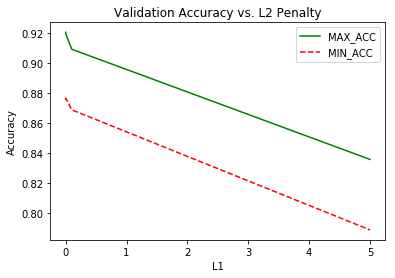

None
---------------------------------------------------------------------------------------------


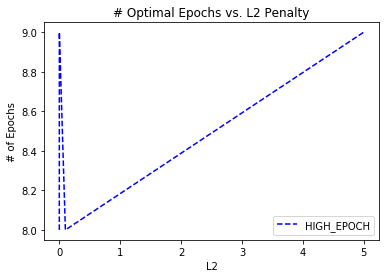

None
---------------------------------------------------------------------------------------------
Model, L2 =  0


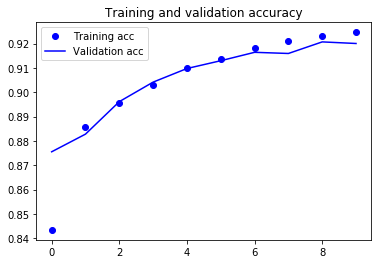

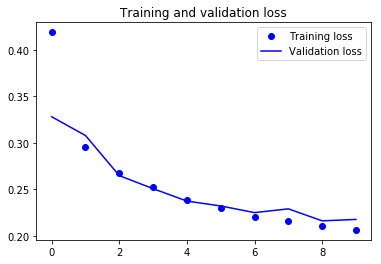

None
---------------------------------------------------------------------------------------------
Model, L2 =  0.001


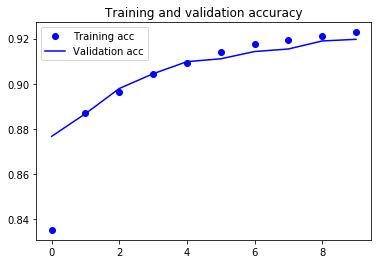

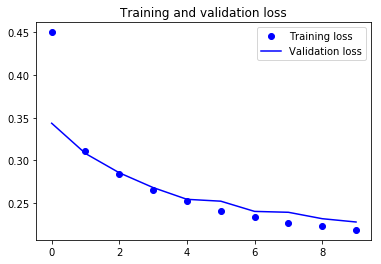

None
---------------------------------------------------------------------------------------------
Model, L2 =  0.1


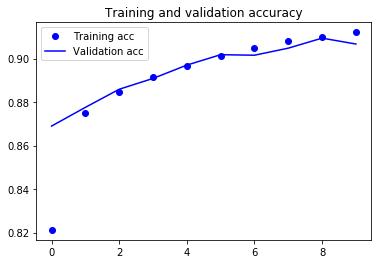

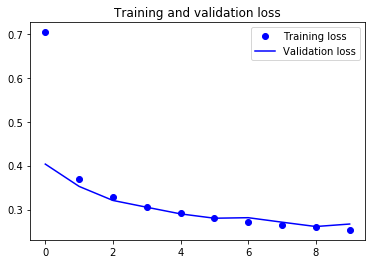

None
---------------------------------------------------------------------------------------------
Model, L2 =  5


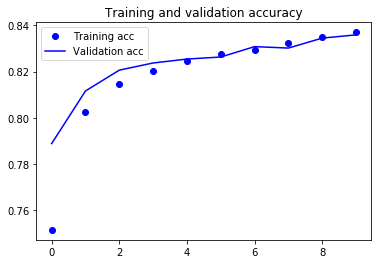

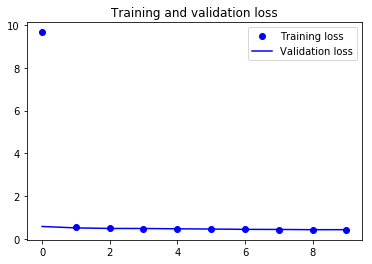

None


In [103]:
#Plot different results. 

from matplotlib import pyplot as plt
# Validation Accuracy vs. L1 Rate
plt.plot(nn_metrics.l2, nn_metrics.MAX_ACC, 'b',color = 'green')
plt.plot(nn_metrics.l2, nn_metrics.MIN_ACC, linestyle ='dashed', color = 'red')
plt.title('Validation Accuracy vs. L2 Penalty')
plt.xlabel('L1')
plt.ylabel('Accuracy')
plt.legend()
print(plt.show())

print('---------------------------------------------------------------------------------------------')
# Max Epoch 
plt.plot(nn_metrics.l2, nn_metrics.HIGH_EPOCH, linestyle ='dashed', color = 'blue')
plt.title('# Optimal Epochs vs. L2 Penalty')
plt.xlabel('L2')
plt.ylabel('# of Epochs')
plt.legend()
print(plt.show())

# Training Vs. Validation Activity
for i, key in enumerate(model_dict.keys()):
    print('---------------------------------------------------------------------------------------------')
    print('Model, L2 = ',l2[i])
    print(validation_plots(model_dict[key]))

C:\Users\thomb\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


Model, L1 =  0
Train on 134494 samples, validate on 33624 samples
Epoch 1/20
134494/134494 [==============================] - 136s 1ms/step - loss: 0.3822 - acc: 0.8533 - val_loss: 0.2860 - val_acc: 0.8909
Epoch 2/20
134494/134494 [==============================] - 126s 939us/step - loss: 0.2669 - acc: 0.8994 - val_loss: 0.2496 - val_acc: 0.9025
Epoch 3/20
134494/134494 [==============================] - 119s 882us/step - loss: 0.2431 - acc: 0.9098 - val_loss: 0.2279 - val_acc: 0.9146
Epoch 4/20
134494/134494 [==============================] - 128s 953us/step - loss: 0.2267 - acc: 0.9176 - val_loss: 0.2294 - val_acc: 0.9152
Epoch 5/20
134494/134494 [==============================] - 132s 983us/step - loss: 0.2161 - acc: 0.9231 - val_loss: 0.2215 - val_acc: 0.9198
Epoch 6/20
134494/134494 [==============================] - 127s 945us/step - loss: 0.2084 - acc: 0.9265 - val_loss: 0.2092 - val_acc: 0.9233
Epoch 7/20
134494/134494 [==============================] - 132s 982us/step - loss: 

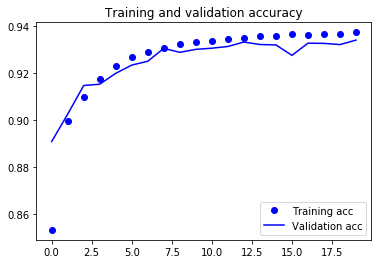

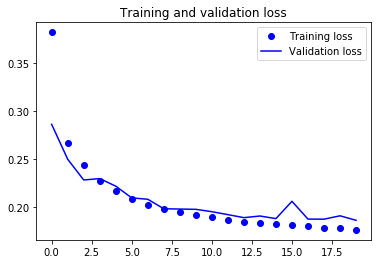

In [112]:
#Running model with different method of combining the ANN and RNN layers.

model_dict = {}
model_list = []
epochs  = 20

#Regularizaton parameters. 
lasso_p = 0
ridge_p = 0
do = .4

#Create the RNN model for the proc embeddings. 
model_RNN = Sequential()
model_RNN.add(Embedding(807, 8))
#Set the weights for the word embeddings to those previously trained. 
model_RNN.layers[0].set_weights([embedding_matrix])
model_RNN.layers[0].trainable = False
model_RNN.add(GRU(32, activation = 'relu'))
model_RNN.add(Dense(10))


#This is the ANN layer where we have demographic inputs. 
model_ANN = Sequential()

model_ANN.add(Dense(10, input_shape=(X_train_ANN.shape[1],)))
model_ANN.add(Dropout(do))
model_ANN.add(Dense(10, kernel_regularizer=regularizers.l1_l2(l1 = lasso_p, l2 = ridge_p), activation = 'relu', kernel_initializer='uniform'))
#     model_ANN.add(Dense(10, kernel_regularizer=regularizers.l1_l2(l1 = .01)))
model_ANN.add(Dense(10))


#Here we're merging the model together. 
model = Sequential()

model.add(Merge([model_RNN, model_ANN], mode='concat'))


model.add(Dense(20, kernel_regularizer=regularizers.l1_l2(l1 = lasso_p, l2 = ridge_p), activation = 'relu'))
model_ANN.add(Dropout(do))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# print('Model, L1 = ', value)
model_dict['model' + str(i)] = model.fit([X_train_RNN,X_train_ANN], y_train,
                      batch_size=32,
                      epochs=epochs,
                      validation_data= ([X_test_RNN, X_test_ANN], y_test))



model_list.append('model'+str(i))

validation_plots(model_dict['model' + str(i)])
print('\n\n')

In [118]:
#Compare predictions and actuals
y_preds =model.predict_classes([X_test_RNN, X_test_ANN])

In [128]:
# Make a confusion matrix.
y_test_conf = []
for i in y_test:
    if i[0]==1:
        y_test_conf.append(0)
    elif i[1]==1:
        y_test_conf.append(1)
    elif i[2]==1:
        y_test_conf.append(2)

In [131]:
type(y_preds)
np.array(y_test_conf).shape

(33624,)

In [132]:
#patient - member - overlap

from sklearn.metrics import confusion_matrix
confusion_matrix(np.array(y_test_conf), y_preds)

array([[14934,   103,    10],
       [  164, 15132,   172],
       [  147,  1626,  1336]], dtype=int64)

In [134]:
all_overlap = []
for i in y_test_conf:
    if i == 2:
        all_overlap.append(1)
sum(all_overlap)

3109